# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    # 使用 SGD
    optimizer = keras.optimizers.SGD(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-SGD-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 RMSProp
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-RMSprop-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 AdaGrad
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Adagrad-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
    # 使用 Adam
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-Adam-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

50000/50000 [==============================] - 4s 89us/step - loss: 0.8035 - acc: 0.7136 - val_loss: 1.7255 - val_acc: 0.4659
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 120us/step - loss: 14.4382 - acc: 0.1028 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - 

50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 121us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==

Epoch 15/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 7s 138us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 7s 137us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
5

Epoch 14/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5721 - acc: 0.4426 - val_loss: 1.6498 - val_acc: 0.4119
Epoch 15/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5534 - acc: 0.4502 - val_loss: 1.6129 - val_acc: 0.4177
Epoch 16/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5298 - acc: 0.4558 - val_loss: 1.7210 - val_acc: 0.3877
Epoch 17/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5182 - acc: 0.4608 - val_loss: 1.6314 - val_acc: 0.4258
Epoch 18/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5002 - acc: 0.4677 - val_loss: 1.5114 - val_acc: 0.4521
Epoch 19/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4896 - acc: 0.4710 - val_loss: 1.5961 - val_acc: 0.4418
Epoch 20/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4714 - acc: 0.4783 - val_loss: 1.6954 - val_acc: 0.3978
Epoch 21/50
50000/50000 [======

50000/50000 [==============================] - 6s 126us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 7s 133us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 6s 125us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [

Epoch 30/50
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 6s 121us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 6s 111us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 6s 120us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
5

Epoch 38/50
50000/50000 [==============================] - 7s 141us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 8s 153us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
5

50000/50000 [==============================] - 4s 89us/step - loss: 1.7462 - acc: 0.3826 - val_loss: 1.7508 - val_acc: 0.3874
Epoch 38/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7402 - acc: 0.3849 - val_loss: 1.7549 - val_acc: 0.3850
Epoch 39/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7353 - acc: 0.3874 - val_loss: 1.7526 - val_acc: 0.3808
Epoch 40/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7303 - acc: 0.3898 - val_loss: 1.7365 - val_acc: 0.3875
Epoch 41/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7249 - acc: 0.3915 - val_loss: 1.7353 - val_acc: 0.3874
Epoch 42/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7193 - acc: 0.3933 - val_loss: 1.7252 - val_acc: 0.3916
Epoch 43/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.7147 - acc: 0.3949 - val_loss: 1.7242 - val_acc: 0.3914
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 116us/step - loss: 0.8866 - acc: 0.6806 - val_loss: 1.7618 - val_acc: 0.4893
Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.8691 - acc: 0.6881 - val_loss: 1.8071 - val_acc: 0.4840
Epoch 47/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.8576 - acc: 0.6903 - val_loss: 1.7408 - val_acc: 0.4917
Epoch 48/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.8433 - acc: 0.6965 - val_loss: 1.8237 - val_acc: 0.4892
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.8348 - acc: 0.6993 - val_loss: 2.0027 - val_acc: 0.4685
Epoch 50/50
50000/50000 [==============================] - 6s 130us/step - loss: 0.8225 - acc: 0.7031 - val_loss: 1.8360 - val_acc: 0.4832
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.6001 - acc: 0.7883 - val_loss: 1.7553 - val_ac

50000/50000 [==============================] - 8s 166us/step - loss: 0.6647 - acc: 0.7573 - val_loss: 1.9216 - val_acc: 0.5053
Epoch 4/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.6378 - acc: 0.7697 - val_loss: 1.9786 - val_acc: 0.5005
Epoch 5/50
50000/50000 [==============================] - 9s 175us/step - loss: 0.6274 - acc: 0.7724 - val_loss: 1.9611 - val_acc: 0.4994
Epoch 6/50
50000/50000 [==============================] - 9s 185us/step - loss: 0.6198 - acc: 0.7746 - val_loss: 1.9974 - val_acc: 0.5006
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.6087 - acc: 0.7798 - val_loss: 2.0636 - val_acc: 0.5029
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 0.5954 - acc: 0.7854 - val_loss: 2.1006 - val_acc: 0.5024
Epoch 9/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.6029 - acc: 0.7828 - val_loss: 2.1086 - val_acc: 0.5016
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 5s 93us/step - loss: 2.3084 - acc: 0.0792 - val_loss: 2.3059 - val_acc: 0.0806
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.3033 - acc: 0.0865 - val_loss: 2.3014 - val_acc: 0.0880
Epoch 4/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.2990 - acc: 0.0944 - val_loss: 2.2975 - val_acc: 0.0972
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.2950 - acc: 0.1056 - val_loss: 2.2938 - val_acc: 0.1087
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.2912 - acc: 0.1150 - val_loss: 2.2902 - val_acc: 0.1203
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.2877 - acc: 0.1250 - val_loss: 2.2869 - val_acc: 0.1288
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.2844 - acc: 0.1331 - val_loss: 2.2839 - val_acc: 0.1371
Epoch 9/50
50000/50000 [===========================

50000/50000 [==============================] - 8s 163us/step - loss: 1.5014 - acc: 0.4707 - val_loss: 1.6114 - val_acc: 0.4346
Epoch 12/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.4794 - acc: 0.4783 - val_loss: 1.5025 - val_acc: 0.4672
Epoch 13/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4605 - acc: 0.4861 - val_loss: 1.5335 - val_acc: 0.4537
Epoch 14/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4401 - acc: 0.4921 - val_loss: 1.5501 - val_acc: 0.4565
Epoch 15/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.4218 - acc: 0.4964 - val_loss: 1.6330 - val_acc: 0.4095
Epoch 16/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.4041 - acc: 0.5024 - val_loss: 1.5009 - val_acc: 0.4608
Epoch 17/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3893 - acc: 0.5103 - val_loss: 1.4722 - val_acc: 0.4745
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 5s 109us/step - loss: 0.8369 - acc: 0.7176 - val_loss: 1.2854 - val_acc: 0.5628
Epoch 20/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.8362 - acc: 0.7175 - val_loss: 1.2861 - val_acc: 0.5614
Epoch 21/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.8358 - acc: 0.7173 - val_loss: 1.2854 - val_acc: 0.5627
Epoch 22/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.8351 - acc: 0.7181 - val_loss: 1.2854 - val_acc: 0.5612
Epoch 23/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.8346 - acc: 0.7176 - val_loss: 1.2860 - val_acc: 0.5616
Epoch 24/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.8341 - acc: 0.7189 - val_loss: 1.2857 - val_acc: 0.5620
Epoch 25/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.8336 - acc: 0.7190 - val_loss: 1.2858 - val_acc: 0.5604
Epoch 26/50
50000/50000 [==============

Epoch 28/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5533 - acc: 0.8121 - val_loss: 1.5543 - val_acc: 0.5409
Epoch 29/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.5389 - acc: 0.8183 - val_loss: 1.6478 - val_acc: 0.5325
Epoch 30/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.5337 - acc: 0.8180 - val_loss: 1.5896 - val_acc: 0.5421
Epoch 31/50
50000/50000 [==============================] - 8s 167us/step - loss: 0.5206 - acc: 0.8220 - val_loss: 1.6196 - val_acc: 0.5442
Epoch 32/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.5037 - acc: 0.8315 - val_loss: 1.6402 - val_acc: 0.5352
Epoch 33/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.5030 - acc: 0.8295 - val_loss: 1.6226 - val_acc: 0.5410
Epoch 34/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.4869 - acc: 0.8368 - val_loss: 1.6631 - val_acc: 0.5416
Epoch 35/50
50000/50000 [==

50000/50000 [==============================] - 5s 90us/step - loss: 2.3089 - acc: 0.0995 - val_loss: 2.3090 - val_acc: 0.1003
Epoch 28/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3083 - acc: 0.0993 - val_loss: 2.3084 - val_acc: 0.1002
Epoch 29/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3078 - acc: 0.0994 - val_loss: 2.3079 - val_acc: 0.1002
Epoch 30/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3073 - acc: 0.0991 - val_loss: 2.3074 - val_acc: 0.1002
Epoch 31/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.3068 - acc: 0.0995 - val_loss: 2.3069 - val_acc: 0.1005
Epoch 32/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3064 - acc: 0.0995 - val_loss: 2.3064 - val_acc: 0.0997
Epoch 33/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3059 - acc: 0.0997 - val_loss: 2.3059 - val_acc: 0.1001
Epoch 34/50
50000/50000 [=====================

Epoch 36/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5775 - acc: 0.4472 - val_loss: 1.5976 - val_acc: 0.4394
Epoch 37/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5726 - acc: 0.4525 - val_loss: 1.5936 - val_acc: 0.4427
Epoch 38/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5655 - acc: 0.4533 - val_loss: 1.6446 - val_acc: 0.4262
Epoch 39/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5599 - acc: 0.4569 - val_loss: 1.5908 - val_acc: 0.4415
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.5555 - acc: 0.4552 - val_loss: 1.6303 - val_acc: 0.4209
Epoch 41/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.5498 - acc: 0.4589 - val_loss: 1.5821 - val_acc: 0.4457
Epoch 42/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5457 - acc: 0.4593 - val_loss: 1.5769 - val_acc: 0.4458
Epoch 43/50
50000/50000 [==

50000/50000 [==============================] - 6s 114us/step - loss: 1.4862 - acc: 0.4834 - val_loss: 1.5357 - val_acc: 0.4590
Epoch 45/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4862 - acc: 0.4836 - val_loss: 1.5358 - val_acc: 0.4598
Epoch 46/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4861 - acc: 0.4834 - val_loss: 1.5357 - val_acc: 0.4595
Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4860 - acc: 0.4834 - val_loss: 1.5356 - val_acc: 0.4593
Epoch 48/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4860 - acc: 0.4837 - val_loss: 1.5357 - val_acc: 0.4591
Epoch 49/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4859 - acc: 0.4836 - val_loss: 1.5355 - val_acc: 0.4594
Epoch 50/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.4858 - acc: 0.4838 - val_loss: 1.5355 - val_acc: 0.4600
Train on 50000 samples, validate on 100

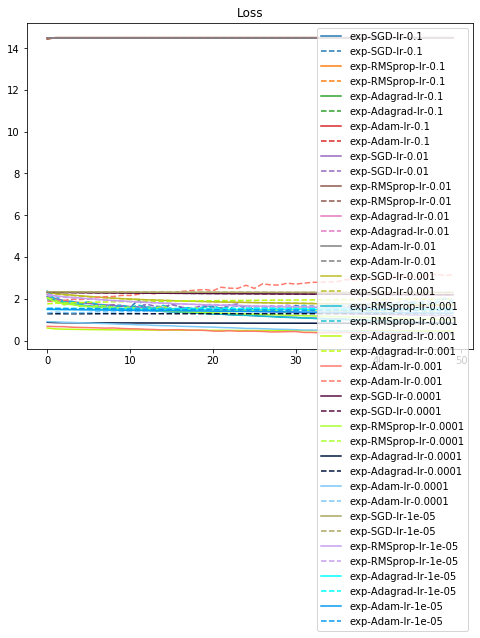

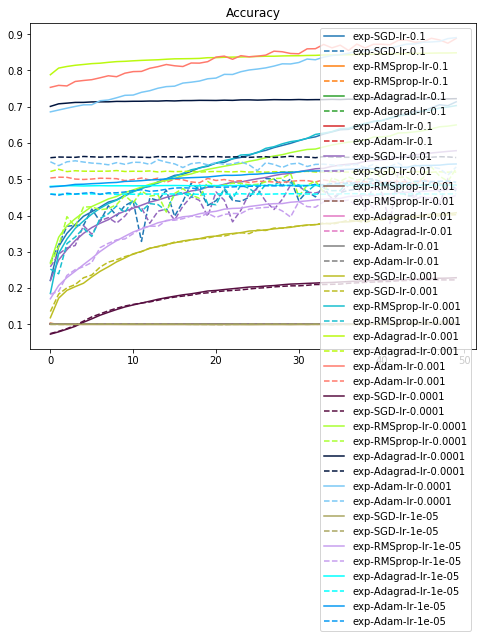

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", 
             "xkcd:yellowgreen", "xkcd:salmon", "xkcd:plum", "xkcd:lime",
             "xkcd:navy", "xkcd:lightblue", "xkcd:khaki", "xkcd:lavender",
             "xkcd:cyan","xkcd:azure"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()